# Presenting all the built-in solvers working in 1d

In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [2]:
import exponax as ex

# Linear PDEs

### Advection

$$ \frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0 $$

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


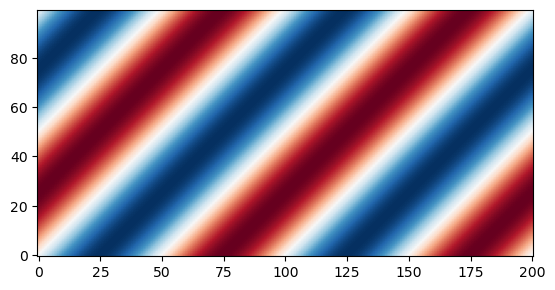

In [3]:
DOMAIN_EXTENT = 1.0
NUM_POINTS = 100
DT = 0.01
VELOCITY = 1.0

advection_stepper = ex.stepper.Advection(
    1, DOMAIN_EXTENT, NUM_POINTS, DT, velocity=VELOCITY
)

grid = ex.make_grid(1, DOMAIN_EXTENT, NUM_POINTS)
u_0 = jnp.sin(2 * jnp.pi * grid / DOMAIN_EXTENT)
advection_trj = ex.rollout(advection_stepper, 200, include_init=True)(u_0)

plt.imshow(advection_trj[:, 0, :].T, origin="lower", cmap="RdBu_r", vmin=-1, vmax=1)

### Diffusion

$$ \frac{\partial u}{\partial t} = \nu \frac{\partial^2 u}{\partial x^2} $$

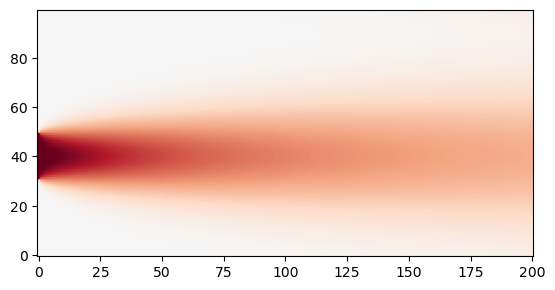

In [4]:
DOMAIN_EXTENT = 1.0
NUM_POINTS = 100
DT = 0.01
NU = 0.01

diffusion_stepper = ex.stepper.Diffusion(
    1, DOMAIN_EXTENT, NUM_POINTS, DT, diffusivity=NU
)

grid = ex.make_grid(1, DOMAIN_EXTENT, NUM_POINTS)
u_0 = jnp.where((grid > 0.3) & (grid < 0.5), 1.0, 0.0)

diffusion_trj = ex.rollout(diffusion_stepper, 200, include_init=True)(u_0)

plt.imshow(diffusion_trj[:, 0, :].T, origin="lower", cmap="RdBu_r", vmin=-1, vmax=1)

### Advection-Diffusion

$$ \frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = \nu \frac{\partial^2 u}{\partial x^2} $$

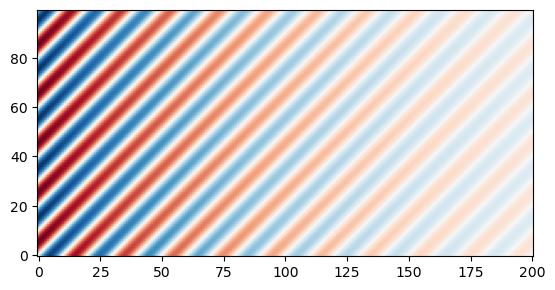

In [5]:
DOMAIN_EXTENT = 1.0
NUM_POINTS = 100
DT = 0.01
VELOCITY = 1.0
NU = 0.001

advection_diffusion_stepper = ex.stepper.AdvectionDiffusion(
    1, DOMAIN_EXTENT, NUM_POINTS, DT, velocity=VELOCITY, diffusivity=NU
)

grid = ex.make_grid(1, DOMAIN_EXTENT, NUM_POINTS)
u_0 = jnp.sin(10 * jnp.pi * grid / DOMAIN_EXTENT)

advection_diffusion_trj = ex.rollout(
    advection_diffusion_stepper, 200, include_init=True
)(u_0)

plt.imshow(
    advection_diffusion_trj[:, 0, :].T, origin="lower", cmap="RdBu_r", vmin=-1, vmax=1
)

### Dispersion

$$ \frac{\partial u}{\partial t} + \xi \frac{\partial^3 u}{\partial x^3} = 0 $$

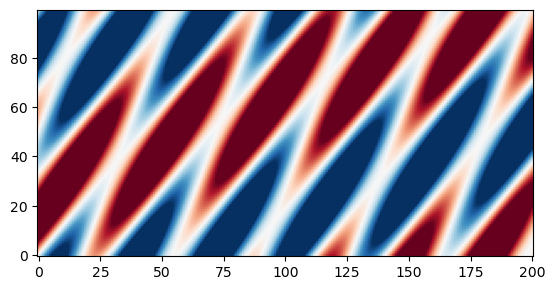

In [6]:
DOMAIN_EXTENT = 1.0
NUM_POINTS = 100
DT = 0.01
DISPERSIVITY = 0.01

dispersion_stepper = ex.stepper.Dispersion(
    1, DOMAIN_EXTENT, NUM_POINTS, DT, dispersivity=DISPERSIVITY
)

grid = ex.make_grid(1, DOMAIN_EXTENT, NUM_POINTS)
u_0 = jnp.sin(2 * jnp.pi * grid / DOMAIN_EXTENT) + jnp.sin(
    4 * jnp.pi * grid / DOMAIN_EXTENT
)

dispersion_trj = ex.rollout(dispersion_stepper, 200, include_init=True)(u_0)

plt.imshow(dispersion_trj[:, 0, :].T, origin="lower", cmap="RdBu_r", vmin=-1, vmax=1)

### Hyper-Diffusion

$$ \frac{\partial u}{\partial t} = - \mu \frac{\partial^4 u}{\partial x^4} $$

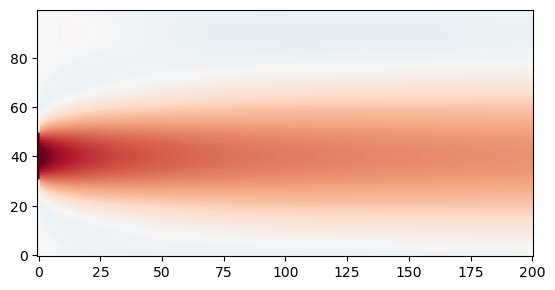

In [7]:
DOMAIN_EXTENT = 1.0
NUM_POINTS = 100
DT = 0.01
HYPER_DIFFUSIVITY = 0.0001

hyper_diffusion_stepper = ex.stepper.HyperDiffusion(
    1, DOMAIN_EXTENT, NUM_POINTS, DT, hyper_diffusivity=HYPER_DIFFUSIVITY
)

grid = ex.make_grid(1, DOMAIN_EXTENT, NUM_POINTS)
u_0 = jnp.where((grid > 0.3) & (grid < 0.5), 1.0, 0.0)

hyper_diffusion_trj = ex.rollout(hyper_diffusion_stepper, 200, include_init=True)(u_0)

plt.imshow(
    hyper_diffusion_trj[:, 0, :].T, origin="lower", cmap="RdBu_r", vmin=-1, vmax=1
)

### General linear stepper

$$ \frac{\partial u}{\partial t} = a_0 u + a_1 \frac{\partial u}{\partial x} + a_2 \frac{\partial^2 u}{\partial x^2} + a_3 \frac{\partial^3 u}{\partial x^3} + a_4 \frac{\partial^4 u}{\partial x^4} $$

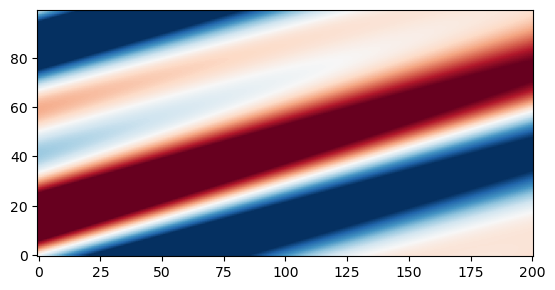

In [8]:
DOMAIN_EXTENT = 1.0
NUM_POINTS = 100
DT = 0.01
a_0 = -0.01
a_1 = -0.3
a_2 = 0.001
a_3 = -0.0001
a_4 = -0.00001

general_linear_stepper = ex.stepper.GeneralLinearStepper(
    1,
    DOMAIN_EXTENT,
    NUM_POINTS,
    DT,
    coefficients=[a_0, a_1, a_2, a_3, a_4],
)

grid = ex.make_grid(1, DOMAIN_EXTENT, NUM_POINTS)
u_0 = jnp.sin(2 * jnp.pi * grid / DOMAIN_EXTENT) + jnp.sin(
    4 * jnp.pi * grid / DOMAIN_EXTENT
)

general_linear_trj = ex.rollout(general_linear_stepper, 200, include_init=True)(u_0)

plt.imshow(
    general_linear_trj[:, 0, :].T, origin="lower", cmap="RdBu_r", vmin=-1, vmax=1
)

# Nonlinear PDEs

### Burgers

$$ \frac{\partial u}{\partial t} + \frac{1}{2} \frac{\partial u^2}{\partial x} = \nu \frac{\partial^2 u}{\partial x^2} $$

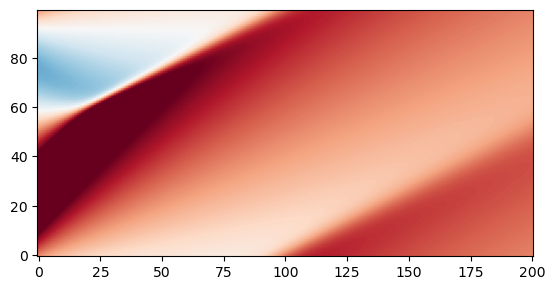

In [9]:
DOMAIN_EXTENT = 1.0
NUM_POINTS = 100
DT = 0.01
NU = 0.01

burgers_stepper = ex.stepper.Burgers(1, DOMAIN_EXTENT, NUM_POINTS, DT, diffusivity=NU)

grid = ex.make_grid(1, DOMAIN_EXTENT, NUM_POINTS)
u_0 = jnp.sin(2 * jnp.pi * grid / DOMAIN_EXTENT) + 0.5

burgers_trj = ex.rollout(burgers_stepper, 200, include_init=True)(u_0)

plt.imshow(burgers_trj[:, 0, :].T, origin="lower", cmap="RdBu_r", vmin=-1, vmax=1)

### Kuramoto-Sivashinsky (KS)

$$ \frac{\partial u}{\partial t} + \frac{1}{2} \left(\frac{\partial u}{\partial x}\right)^2 + \frac{\partial^2 u}{\partial x^2} + \frac{\partial^4 u}{\partial x^4} = 0 $$

Format used in combustion research.

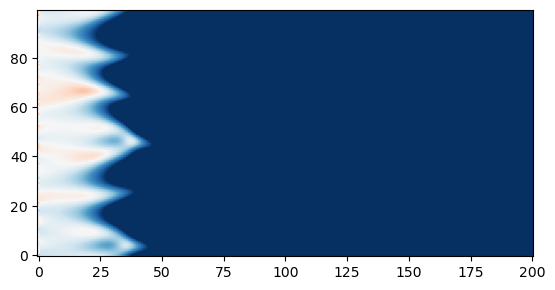

In [10]:
DOMAIN_EXTENT = 60.0
NUM_POINTS = 100
DT = 0.5

ks_stepper = ex.stepper.KuramotoSivashinsky(1, DOMAIN_EXTENT, NUM_POINTS, DT)

u_0 = jax.random.normal(
    jax.random.PRNGKey(0),
    (
        1,
        NUM_POINTS,
    ),
)  # IC is irrelevant

ks_trj = ex.rollout(ks_stepper, 200, include_init=True)(u_0)

plt.imshow(ks_trj[:, 0, :].T, origin="lower", cmap="RdBu_r", vmin=-6, vmax=6)

### Kuramoto-Sivashinsky (KS) Conservative

$$ \frac{\partial u}{\partial t} + \frac{1}{2} \frac{\partial u^2}{\partial x} + \frac{\partial^2 u}{\partial x^2} + \frac{\partial^4 u}{\partial x^4} = 0 $$

conservative format used in fluid dynamics

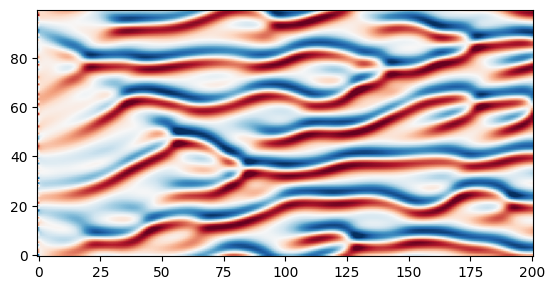

In [11]:
DOMAIN_EXTENT = 60.0
NUM_POINTS = 100
DT = 0.5

conservative_ks_stepper = ex.stepper.KuramotoSivashinskyConservative(
    1, DOMAIN_EXTENT, NUM_POINTS, DT
)

u_0 = jax.random.normal(
    jax.random.PRNGKey(0),
    (
        1,
        NUM_POINTS,
    ),
)  # IC is irrelevant

conservative_ks_trj = ex.rollout(conservative_ks_stepper, 200, include_init=True)(u_0)

plt.imshow(
    conservative_ks_trj[:, 0, :].T, origin="lower", cmap="RdBu_r", vmin=-2.5, vmax=2.5
)

### Korteweg-de Vries (KdV)

$$ \frac{\partial u}{\partial t} - \frac{6}{2} \frac{\partial u^2}{\partial x} + \frac{\partial^3 u}{\partial x^3} = 0 $$

negative (and scaled) convection

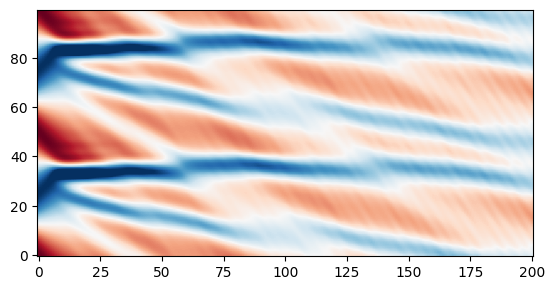

In [12]:
DOMAIN_EXTENT = 30.0
NUM_POINTS = 100
DT = 0.05

# Check documentation, the KdV stepper used "-6/2" convection scale by default
# to admit simple soliton solutions
ks_stepper = ex.stepper.KortewegDeVries(1, DOMAIN_EXTENT, NUM_POINTS, DT)

grid = ex.make_grid(1, DOMAIN_EXTENT, NUM_POINTS)
u_0 = jnp.cos(4 * jnp.pi * grid / DOMAIN_EXTENT)

kdv_trj = ex.rollout(ks_stepper, 200, include_init=True)(u_0)

plt.imshow(kdv_trj[:, 0, :].T, origin="lower", cmap="RdBu_r", vmin=-1, vmax=1)

### Nikolaevskiy

$$ \frac{\partial u}{\partial t} + \frac{1}{2} \left(\frac{\partial u}{\partial x}\right) - 0.1 \frac{\partial^2 u}{\partial x^2} - \frac{\partial^4 u}{\partial x^4} - \frac{\partial^6 u}{\partial x^6} = 0 $$

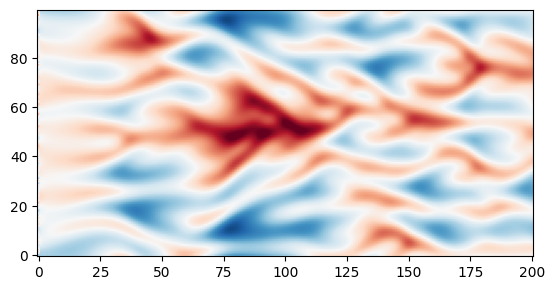

In [13]:
DOMAIN_EXTENT = 60.0
NUM_POINTS = 100
DT = 1.0

niko_stepper = ex.stepper.Nikolaevskiy(1, DOMAIN_EXTENT, NUM_POINTS, DT)

u_0 = jax.random.normal(
    jax.random.PRNGKey(0),
    (
        1,
        NUM_POINTS,
    ),
)  # IC is irrelevant

niko_trj = ex.rollout(niko_stepper, 200, include_init=True)(u_0)

plt.imshow(niko_trj[:, 0, :].T, origin="lower", cmap="RdBu_r", vmin=-6, vmax=6)

### Nikolaevskiy Conservative

$$ \frac{\partial u}{\partial t} + \frac{1}{2} \frac{\partial u^2}{\partial x} - 0.1 \frac{\partial^2 u}{\partial x^2} - \frac{\partial^4 u}{\partial x^4} - \frac{\partial^6 u}{\partial x^6} = 0 $$

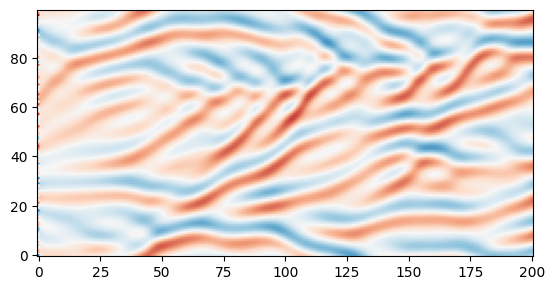

In [14]:
DOMAIN_EXTENT = 60.0
NUM_POINTS = 100
DT = 1.0

niko_conservative_stepper = ex.stepper.NikolaevskiyConservative(
    1, DOMAIN_EXTENT, NUM_POINTS, DT
)

u_0 = jax.random.normal(
    jax.random.PRNGKey(0),
    (
        1,
        NUM_POINTS,
    ),
)  # IC is irrelevant

niko_conservative_trj = ex.rollout(niko_conservative_stepper, 200, include_init=True)(
    u_0
)

plt.imshow(
    niko_conservative_trj[:, 0, :].T, origin="lower", cmap="RdBu_r", vmin=-2.5, vmax=2.5
)

### General Gradient Norm Stepper

$$ \frac{\partial u}{\partial t} + b \frac{1}{2} \left(\frac{\partial u}{\partial x}\right)^2
= a_0 u + a_1 \frac{\partial u}{\partial x} + a_2 \frac{\partial^2 u}{\partial
x^2} + a_3 \frac{\partial^3 u}{\partial x^3} + a_4 \frac{\partial^4 u}{\partial
x^4} $$

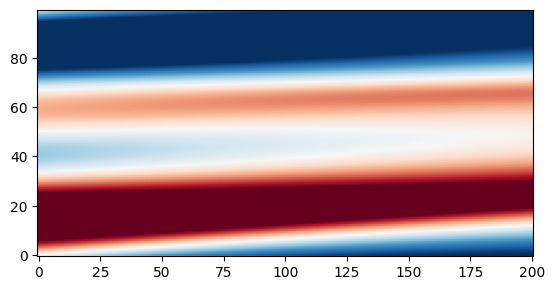

In [15]:
DOMAIN_EXTENT = 40.0
NUM_POINTS = 100
DT = 0.05

b = 1.4
a_0 = -0.01
a_1 = -0.3
a_2 = +0.1
a_3 = -0.0001
a_4 = -0.01

general_gradient_norm_stepper = ex.stepper.GeneralGradientNormStepper(
    1,
    DOMAIN_EXTENT,
    NUM_POINTS,
    DT,
    gradient_norm_scale=b,
    coefficients=[a_0, a_1, a_2, a_3, a_4],
)

grid = ex.make_grid(1, DOMAIN_EXTENT, NUM_POINTS)
u_0 = jnp.sin(2 * jnp.pi * grid / DOMAIN_EXTENT) + jnp.sin(
    4 * jnp.pi * grid / DOMAIN_EXTENT
)

general_gradient_norm_trj = ex.rollout(
    general_gradient_norm_stepper, 200, include_init=True
)(u_0)

plt.imshow(
    general_gradient_norm_trj[:, 0, :].T, origin="lower", cmap="RdBu_r", vmin=-1, vmax=1
)

### General Convection

$$ \frac{\partial u}{\partial t} + b \frac{1}{2} \frac{\partial u^2}{\partial x}
= a_0 u + a_1 \frac{\partial u}{\partial x} + a_2 \frac{\partial^2 u}{\partial
x^2} + a_3 \frac{\partial^3 u}{\partial x^3} + a_4 \frac{\partial^4 u}{\partial
x^4} $$

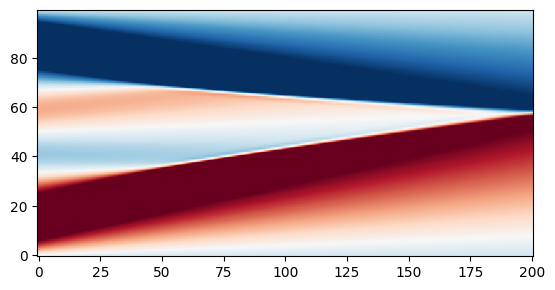

In [16]:
DOMAIN_EXTENT = 40.0
NUM_POINTS = 100
DT = 0.05

b = 1.4
a_0 = -0.01
a_1 = -0.3
a_2 = +0.1
a_3 = -0.0001
a_4 = -0.01

general_convection_stepper = ex.stepper.GeneralConvectionStepper(
    1,
    DOMAIN_EXTENT,
    NUM_POINTS,
    DT,
    convection_scale=b,
    coefficients=[a_0, a_1, a_2, a_3, a_4],
)

grid = ex.make_grid(1, DOMAIN_EXTENT, NUM_POINTS)
u_0 = jnp.sin(2 * jnp.pi * grid / DOMAIN_EXTENT) + jnp.sin(
    4 * jnp.pi * grid / DOMAIN_EXTENT
)

general_convection_trj = ex.rollout(general_convection_stepper, 200, include_init=True)(
    u_0
)

plt.imshow(
    general_convection_trj[:, 0, :].T, origin="lower", cmap="RdBu_r", vmin=-1, vmax=1
)

# ToDo: Reaction-Diffusion Systems

# All together

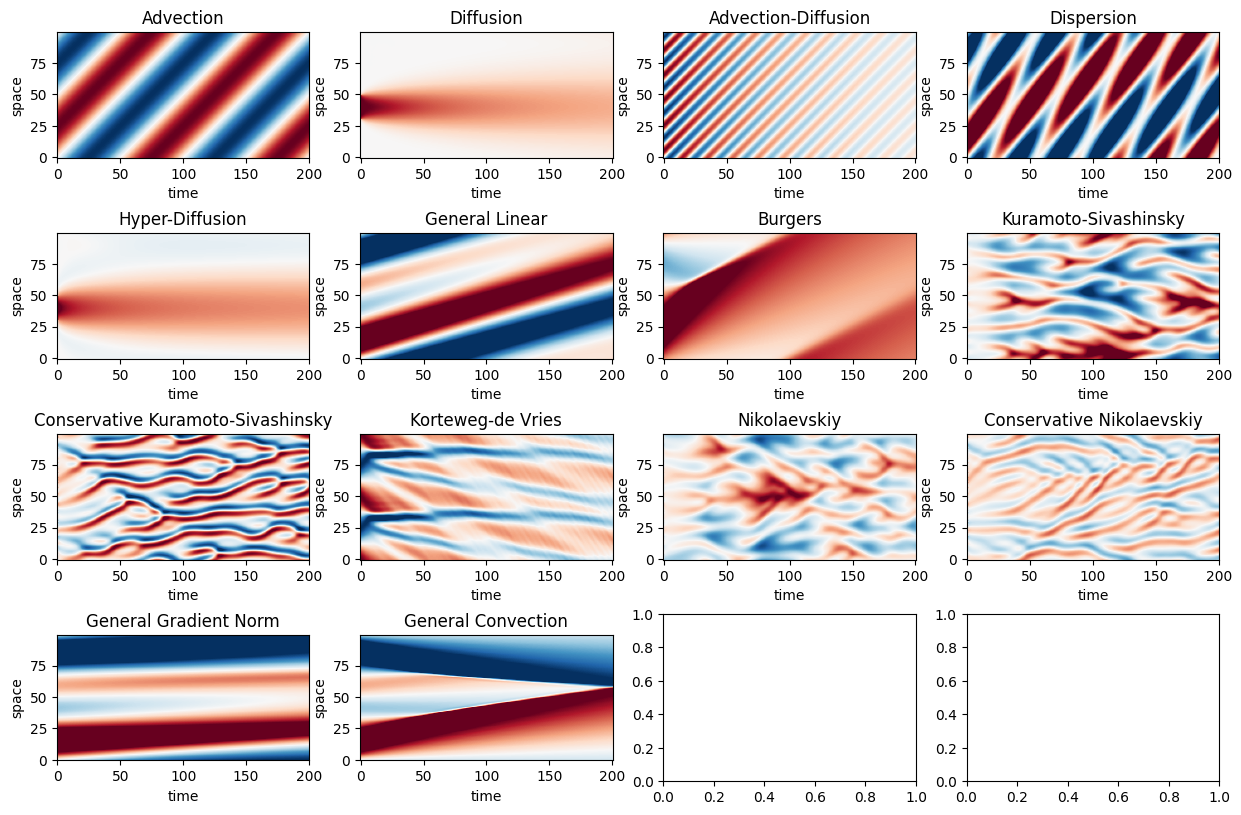

In [17]:
fig, ax_s = plt.subplots(4, 4, figsize=(15, 10))

for (
    ax,
    trj,
    title,
    limits,
) in zip(
    ax_s.flatten(),
    [
        advection_trj,
        diffusion_trj,
        advection_diffusion_trj,
        dispersion_trj,
        hyper_diffusion_trj,
        general_linear_trj,
        burgers_trj,
        ks_trj,
        conservative_ks_trj,
        kdv_trj,
        niko_trj,
        niko_conservative_trj,
        general_gradient_norm_trj,
        general_convection_trj,
    ],
    [
        "Advection",
        "Diffusion",
        "Advection-Diffusion",
        "Dispersion",
        "Hyper-Diffusion",
        "General Linear",
        "Burgers",
        "Kuramoto-Sivashinsky",
        "Conservative Kuramoto-Sivashinsky",
        "Korteweg-de Vries",
        "Nikolaevskiy",
        "Conservative Nikolaevskiy",
        "General Gradient Norm",
        "General Convection",
    ],
    [
        (-1, 1),
        (-1, 1),
        (-1, 1),
        (-1, 1),
        (-1, 1),
        (-1, 1),
        (-1, 1),
        (-6, 6),
        (-2.5, 2.5),
        (-1, 1),
        (-6, 6),
        (-2.5, 2.5),
        (-1, 1),
        (-1, 1),
    ],
):
    ax.imshow(
        trj[:, 0, :].T, origin="lower", cmap="RdBu_r", vmin=limits[0], vmax=limits[1]
    )
    ax.set_title(title)
    ax.set_xlabel("time")
    ax.set_ylabel("space")